In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.cluster import KMeans,AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [2]:
df=pd.read_csv("/Users/vn55le3/Downloads/DS2023Talendig/Datasets/bank_transactions.csv")
df=df.dropna().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1041614 non-null  object 
 1   CustomerID               1041614 non-null  object 
 2   CustomerDOB              1041614 non-null  object 
 3   CustGender               1041614 non-null  object 
 4   CustLocation             1041614 non-null  object 
 5   CustAccountBalance       1041614 non-null  float64
 6   TransactionDate          1041614 non-null  object 
 7   TransactionTime          1041614 non-null  int64  
 8   TransactionAmount (INR)  1041614 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 71.5+ MB


In [3]:
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [4]:
df["CustLocation"].nunique()

9275

In [3]:
le=LabelEncoder()
ohe=OneHotEncoder()
col=df["CustLocation"]
col_cod=le.fit_transform(col)
df["CustLocation"]=col_cod.astype(int)
col=df[["CustGender"]]
ohe.fit(col)
col_tra=ohe.transform(col)
col_tra_df=pd.DataFrame(col_tra.toarray(), columns=ohe.get_feature_names_out())
df_encoded=pd.concat([df,col_tra_df],axis=1)
df_encoded=df_encoded.drop(columns=["CustGender","TransactionID","CustomerID"])
print(df_encoded.info())
df_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041614 entries, 0 to 1041613
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CustomerDOB              1041614 non-null  object 
 1   CustLocation             1041614 non-null  int64  
 2   CustAccountBalance       1041614 non-null  float64
 3   TransactionDate          1041614 non-null  object 
 4   TransactionTime          1041614 non-null  int64  
 5   TransactionAmount (INR)  1041614 non-null  float64
 6   CustGender_F             1041614 non-null  float64
 7   CustGender_M             1041614 non-null  float64
 8   CustGender_T             1041614 non-null  float64
dtypes: float64(5), int64(2), object(2)
memory usage: 71.5+ MB
None


,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustGender_F,CustGender_M,CustGender_T
0,10/1/94,3557,17819.05,2/8/16,143207,25.0,1.0,0.0,0.0
1,4/4/57,3618,2270.69,2/8/16,141858,27999.0,0.0,1.0,0.0
2,26/11/96,5219,17874.44,2/8/16,142712,459.0,1.0,0.0,0.0
3,14/9/73,5219,866503.21,2/8/16,142714,2060.0,1.0,0.0,0.0
4,24/3/88,5606,6714.43,2/8/16,181156,1762.5,1.0,0.0,0.0


In [4]:
df_encoded["CustomerDOB"]=pd.to_datetime(df_encoded["CustomerDOB"])
df_encoded["TransactionDate"]=pd.to_datetime(df_encoded["TransactionDate"])
df_encoded["CustomerDOB"]=df_encoded["CustomerDOB"].dt.year
df_encoded["TransactionDate"]=df_encoded["TransactionDate"].dt.year
df_encoded

/var/folders/g0/r40vcrxd33q23fdr5tkgn8t40000gq/T/ipykernel_21964/3795004076.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded["CustomerDOB"]=pd.to_datetime(df_encoded["CustomerDOB"])
/var/folders/g0/r40vcrxd33q23fdr5tkgn8t40000gq/T/ipykernel_21964/3795004076.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_encoded["TransactionDate"]=pd.to_datetime(df_encoded["TransactionDate"])


,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustGender_F,CustGender_M,CustGender_T
0,1994,3557,17819.05,2016,143207,25.0,1.0,0.0,0.0
1,2057,3618,2270.69,2016,141858,27999.0,0.0,1.0,0.0
2,1996,5219,17874.44,2016,142712,459.0,1.0,0.0,0.0
3,1973,5219,866503.21,2016,142714,2060.0,1.0,0.0,0.0
4,1988,5606,6714.43,2016,181156,1762.5,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1041609,1990,5738,7635.19,2016,184824,799.0,0.0,1.0,0.0
1041610,1992,5580,27311.42,2016,183734,460.0,0.0,1.0,0.0
1041611,1989,3367,221757.06,2016,183313,770.0,0.0,1.0,0.0
1041612,1978,9059,10117.87,2016,184706,1000.0,0.0,1.0,0.0


In [5]:
scaler = StandardScaler()
X=df_encoded
X=scaler.fit_transform(X)
X=pd.DataFrame(X,columns=df_encoded.columns)
X

,CustomerDOB,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustGender_F,CustGender_M,CustGender_T
0,0.224855,-0.223725,-0.114766,0.0,-0.271443,-0.234871,1.646704,-1.646700,-0.00098
1,1.516889,-0.197913,-0.133128,0.0,-0.297758,4.028509,-0.607274,0.607275,-0.00098
2,0.265872,0.479551,-0.114701,0.0,-0.281099,-0.168727,1.646704,-1.646700,-0.00098
3,-0.205823,0.479551,0.887505,0.0,-0.281060,0.075273,1.646704,-1.646700,-0.00098
4,0.101804,0.643310,-0.127881,0.0,0.468830,0.029933,1.646704,-1.646700,-0.00098
...,...,...,...,...,...,...,...,...,...
1041609,0.142821,0.699166,-0.126793,0.0,0.540382,-0.116909,-0.607274,0.607275,-0.00098
1041610,0.183838,0.632308,-0.103556,0.0,0.519120,-0.168575,-0.607274,0.607275,-0.00098
1041611,0.122312,-0.304123,0.126079,0.0,0.510907,-0.121329,-0.607274,0.607275,-0.00098
1041612,-0.103281,2.104447,-0.123861,0.0,0.538080,-0.086276,-0.607274,0.607275,-0.00098


/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

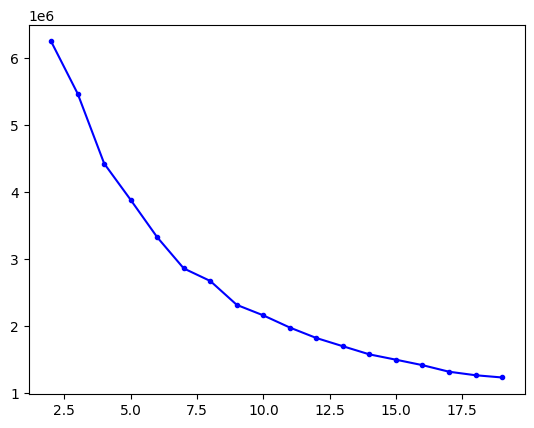

In [9]:
score = []
k_clusters = range(2,20) # Este range va de 2 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    score.append(-kmeans.score(X))
    
plt.plot(k_clusters, score,'b.-')

In [6]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(X)
kmeans.score(X)
#silhouette_score(X, kmeans.labels_)

/Users/vn55le3/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

In [6]:
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_cluster.fit(X)
agg_cluster.score(X)

: 

: 

In [6]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)
dbscan.score(X)

AttributeError: 'DBSCAN' object has no attribute 'score'

In [ ]:
from sklearn.metrics import silhouette_score
